# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem ), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [9]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

# 1. Is the distribution of body temperatures normal?

Below I performed a number of tests for normality including:
* histogram of the data
* boxplot of the data
* D'Agostino and Pearson method

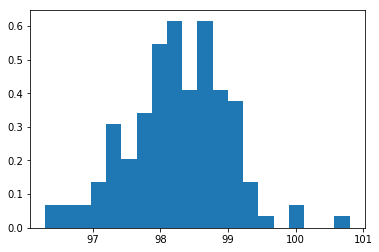

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

 = sorted(df.temperature)
fit = stats.norm.pdf(t, np.mean(t), np.std(t))
plt.plot(t,fit,'-o')
plt.hist(df.temperature, bins = 20, density = True)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()
plt.show()


Graphing the histogram of the data, it appears that the data follows a general bell curve shape that is left skewed. The data also has two temperature peaks which may indicate two different population curves.

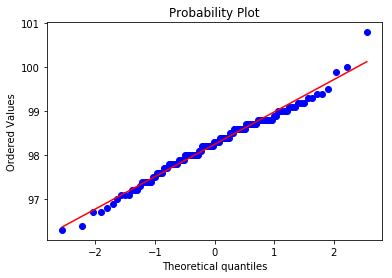

In [17]:
from scipy import stats
# Constructing the probability plot
probplt = stats.probplot(df.temperature, plot=plt)
plt.show()

The probability plot of the data also suggests that the data is normally distributed.

In [12]:
from scipy import stats
alpha = 1e-3
dagostino_results = stats.normaltest(df.temperature)
print("p = {:g}".format(dagostino_results[1]))

if dagostino_results[1] < alpha:  # null hypothesis: df.temperature comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

matrix_dp = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['Sample Data', len(df.temperature) - 1, dagostino_results[0], dagostino_results[1]]
]    
dagostino_table = plotly.figure_factory.create_table(matrix_dp, index=True)
py.iplot(dagostino_table, filename='dagostino-table')

p = 0.258748
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~csignature/0 or inside your plot.ly account where it is named 'dagostino-table'
The null hypothesis cannot be rejected
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~csignature/0 or inside your plot.ly account where it is named 'dagostino-table'


The D'Agostino Pearson method suggests that the body temperatures are normally distributed.

In [13]:
data_skew = scipy.stats.skew(df.temperature)
data_skew

-0.004367976879081625

In [14]:
#null hypothesis = skewness of the population that the sample was drawn from is the same as normal distributed one
skew_sig = scipy.stats.skewtest(df.temperature)
skew_sig

SkewtestResult(statistic=-0.021370491432771, pvalue=0.9829501126135382)

Since the histogram plot appeared to be skewed, I ran two skew tests. A normal distribution should have a skew of 0, however this is generally unlikely so I ran another test to check if the skew was statistically significant.



# 2. Is the sample size large? Are the observations independent?

I ran a Python script to calculate the appropriate sample size for the current human population ([7,632,819,325](http://www.worldometers.info/world-population/?)).

In [27]:
%run -i 'samplesize.py'
given_ssz = len(df.temperature)
print("GIVEN DATA SIZE: %d" % given_ssz)

SAMPLE SIZE: 16513
GIVEN DATA SIZE: 130


If we are considering the total human population, the sample data of 130 observations is not enough. A confidence level of 99% (which is typical for medical application) and a confidence interval of 1 requies a sample size of 16,513. However, if by "large" the question is asking whether the sample size is above the "30 sample" threshold that are required for statistical testing, then the given data size is large.

The observations also seem to be independent as the temperatures of one individual does not impact the temperature of another individual.

# 3. Is the true population mean really 98.6 degrees F?

First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  t or  z statistic?
Now try using the other test. How is the result be different? Why?

We would perform a one-sample bootstrap hypothesis test because we have one set of data and we're comparing it to a single number.

In [38]:
temp_mean = df.temperature.mean()
temp_mean
pop_mean = 98.6
temp_mean_shift = df.temperature - np.mean(temp_mean) + pop_mean

The null hypothesis is that the true population temperature mean is really 98.6 degrees F.

In [35]:
def diff_from_poptemp(data, poptemp=98.6):
    return np.mean(data) - poptemp

In [36]:
diff_obs = diff_from_poptemp(df.temperature)
diff_obs

-0.35076923076921673

In [37]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [43]:
bs_repl = draw_bs_reps(temp_mean_shift, diff_from_poptemp, 10000)
p_value = np.sum(bs_repl <= diff_obs)/10000
p_value

0.0

Since p is less than 0.05, we can reject the null hypothesis that the true population temperature is really 98.6 degrees F.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t and  z statistic?

# 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

# 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [46]:
# Your work here.
male_df = df[df.gender == 'M']
fem_df = df[df.gender == 'F']
male_avg = male_df.temperature.mean()
fem_avg = fem_df.temperature.mean()
print(str(male_avg) + ',' + str(fem_avg))

98.1046153846154,98.39384615384613


In [50]:
from scipy.stats import ttest_ind

t_test = ttest_ind(male_df.temperature,fem_df.temperature)

t_test

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

I used a t-test because it is typically used to tell whether two datasets are statistically different from each other. As the p-value is less than 0.05, the null hypothesis is rejected and there is a statistically significant difference between male and female normal temperature.